# Data exploration

In [198]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns

In [39]:
df = pd.read_csv('./data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data cleaning

In [40]:
df.isna().sum(axis=0)/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [41]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df.loc[:,['Age']].values)

SimpleImputer(strategy='median')

In [295]:
df['Age'] = imp.transform(df.loc[:,['Age']].values)

In [43]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp2.fit(df['Embarked'].values.reshape((len(df['Embarked']),1)))

SimpleImputer(strategy='most_frequent')

In [44]:
df.loc[:,['Embarked']] = imp2.transform(df['Embarked'].values.reshape((len(df['Embarked']),1)))

In [45]:
df.isna().sum(axis=0)/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
dtype: float64

In [296]:
df

,is-Pclass-2,is-Pclass-3,is-Embarked-Q,is-Embarked-S,PassengerId,Survived,Sex,Age,Fare,familysize
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,22.0,7.2500,1.0
1,0.0,0.0,0.0,0.0,2.0,1.0,0.0,38.0,71.2833,1.0
2,0.0,1.0,0.0,1.0,3.0,1.0,0.0,26.0,7.9250,0.0
3,0.0,0.0,0.0,1.0,4.0,1.0,0.0,35.0,53.1000,1.0
4,0.0,1.0,0.0,1.0,5.0,0.0,1.0,35.0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.0,1.0,887.0,0.0,1.0,27.0,13.0000,0.0
887,0.0,0.0,0.0,1.0,888.0,1.0,0.0,19.0,30.0000,0.0
888,0.0,1.0,0.0,1.0,889.0,0.0,0.0,28.0,23.4500,3.0
889,0.0,0.0,0.0,0.0,890.0,1.0,1.0,26.0,30.0000,0.0


## Categorical variables

In [47]:
vars_disc = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for i in vars_disc:
    print(df[i].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [48]:
labelEncoder = preprocessing.LabelEncoder()
df['Sex'] = labelEncoder.fit_transform(df['Sex'])

In [49]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [50]:
ct = ColumnTransformer(
    [('one_hot_encoder',preprocessing.OneHotEncoder(drop='first'),['Pclass', 'Embarked' ])],
    remainder='passthrough')

In [51]:
pd.DataFrame(ct.fit_transform(df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,1.0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN
1,0.0,0.0,0.0,0.0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85
2,0.0,1.0,0.0,1.0,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925,NaN
3,0.0,0.0,0.0,1.0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1,C123
4,0.0,1.0,0.0,1.0,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.0,1.0,887,0,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0,NaN
887,0.0,0.0,0.0,1.0,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0,B42
888,0.0,1.0,0.0,1.0,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.45,NaN
889,0.0,0.0,0.0,0.0,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0,C148


In [52]:
df = pd.DataFrame(ct.fit_transform(df), columns = [
    'is-Pclass-2', 'is-Pclass-3', 'is-Embarked-Q', 'is-Embarked-S', 'PassengerId', 'Survived',
    'Name','Sex', 'Age', 'SibSp','Parch','Ticket','Fare','Cabin']).drop(['Cabin','Ticket','Name'], axis=1).astype(float)

## Choosing variables 

In [62]:
df['familysize'] = df['SibSp'] + df['Parch']

In [66]:
df = df.drop(['SibSp', 'Parch'], axis=1)
df

,is-Pclass-2,is-Pclass-3,is-Embarked-Q,is-Embarked-S,PassengerId,Survived,Sex,Age,Fare,familysize
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,22.0,7.2500,1.0
1,0.0,0.0,0.0,0.0,2.0,1.0,0.0,38.0,71.2833,1.0
2,0.0,1.0,0.0,1.0,3.0,1.0,0.0,26.0,7.9250,0.0
3,0.0,0.0,0.0,1.0,4.0,1.0,0.0,35.0,53.1000,1.0
4,0.0,1.0,0.0,1.0,5.0,0.0,1.0,35.0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.0,1.0,887.0,0.0,1.0,27.0,13.0000,0.0
887,0.0,0.0,0.0,1.0,888.0,1.0,0.0,19.0,30.0000,0.0
888,0.0,1.0,0.0,1.0,889.0,0.0,0.0,28.0,23.4500,3.0
889,0.0,0.0,0.0,0.0,890.0,1.0,1.0,26.0,30.0000,0.0


<AxesSubplot:>

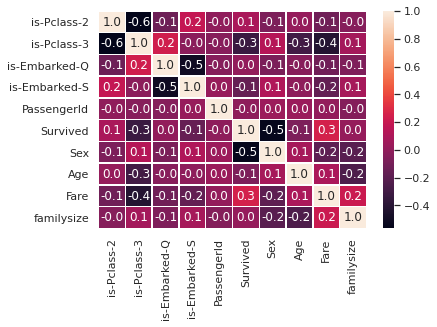

In [208]:
corr = df.corr()
sns.heatmap(corr,yticklabels = corr.columns, xticklabels = corr.columns,annot=True,fmt=".1f",linewidths=.5)

In [70]:
df.describe()

,is-Pclass-2,is-Pclass-3,is-Embarked-Q,is-Embarked-S,PassengerId,Survived,Sex,Age,Fare,familysize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.206510,0.551066,0.086420,0.725028,446.000000,0.383838,0.647587,29.361582,32.204208,0.904602
std,0.405028,0.497665,0.281141,0.446751,257.353842,0.486592,0.477990,13.019697,49.693429,1.613459
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,223.500000,0.000000,0.000000,22.000000,7.910400,0.000000
50%,0.000000,1.000000,0.000000,1.000000,446.000000,0.000000,1.000000,28.000000,14.454200,0.000000
75%,0.000000,1.000000,0.000000,1.000000,668.500000,1.000000,1.000000,35.000000,31.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,891.000000,1.000000,1.000000,80.000000,512.329200,10.000000


In [82]:
X = df[['is-Pclass-2','is-Pclass-3','is-Embarked-Q','is-Embarked-S','Sex','Age','Fare','familysize']].values
y = df['Survived'].values

## Random Forest

In [131]:
classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state=0)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [133]:
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [134]:
y_pred = classifier.predict(X_test)

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [135]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[123,  16],
       [ 18,  66]])

In [138]:
accuracy_score(y_test,y_pred)

0.8475336322869955

## Outliers

In [141]:
sc_X = preprocessing.StandardScaler()
X_trans = sc_X.fit_transform(X)
pd.DataFrame(X_trans)

,0,1,2,3,4,5,6,7
0,-0.510152,0.902587,-0.307562,0.615838,0.737695,-0.565736,-0.502445,0.059160
1,-0.510152,-1.107926,-0.307562,-1.623803,-1.355574,0.663861,0.786845,0.059160
2,-0.510152,0.902587,-0.307562,0.615838,-1.355574,-0.258337,-0.488854,-0.560975
3,-0.510152,-1.107926,-0.307562,0.615838,-1.355574,0.433312,0.420730,0.059160
4,-0.510152,0.902587,-0.307562,0.615838,0.737695,0.433312,-0.486337,-0.560975
...,...,...,...,...,...,...,...,...
886,1.960202,-1.107926,-0.307562,0.615838,0.737695,-0.181487,-0.386671,-0.560975
887,-0.510152,-1.107926,-0.307562,0.615838,-1.355574,-0.796286,-0.044381,-0.560975
888,-0.510152,0.902587,-0.307562,0.615838,-1.355574,-0.104637,-0.176263,1.299429
889,-0.510152,-1.107926,-0.307562,-1.623803,0.737695,-0.258337,-0.044381,-0.560975


<AxesSubplot:>

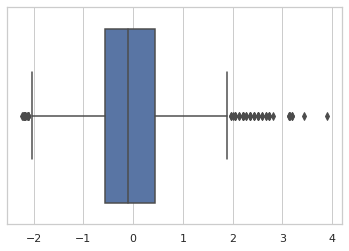

In [164]:
sns.boxplot(x=X_trans[:,5])

In [193]:
outliers = (abs(X_trans[:,5]) > 3) | (abs(X_trans[:,6]) > 3 ) | (abs(X_trans[:,7]) > 3 )
X_cut = X[~outliers,:]
y_cut = Y=y[~outliers]
len(X) - len(X_cut)

52

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_cut,y_cut, test_size = 0.25, random_state = 0)

In [197]:
classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[101  19]
 [ 22  68]]
0.8047619047619048


## Variable reduction

<AxesSubplot:>

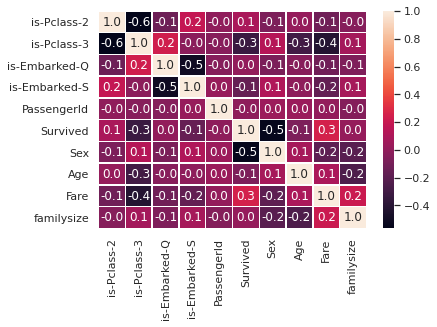

In [210]:
corr = df.corr()
sns.heatmap(corr,yticklabels = corr.columns, xticklabels = corr.columns,annot=True,fmt=".1f",linewidths=.5)

In [209]:
df.columns

Index(['is-Pclass-2', 'is-Pclass-3', 'is-Embarked-Q', 'is-Embarked-S',
       'PassengerId', 'Survived', 'Sex', 'Age', 'Fare', 'familysize'],
      dtype='object')

In [262]:
X = df[['Sex','Age','Fare','familysize']].values
y = df['Survived'].values

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [261]:
classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[124  15]
 [ 22  62]]
0.8340807174887892


In [265]:
sc_X = preprocessing.StandardScaler()
X_trans = sc_X.fit_transform(X)
pd.DataFrame(X_trans)

,0,1,2,3
0,0.737695,-0.565736,-0.502445,0.059160
1,-1.355574,0.663861,0.786845,0.059160
2,-1.355574,-0.258337,-0.488854,-0.560975
3,-1.355574,0.433312,0.420730,0.059160
4,0.737695,0.433312,-0.486337,-0.560975
...,...,...,...,...
886,0.737695,-0.181487,-0.386671,-0.560975
887,-1.355574,-0.796286,-0.044381,-0.560975
888,-1.355574,-0.104637,-0.176263,1.299429
889,0.737695,-0.258337,-0.044381,-0.560975


In [267]:
outliers = (abs(X_trans[:,1]) > 3) | (abs(X_trans[:,2]) > 3 ) | (abs(X_trans[:,3]) > 3 )
X_cut = X[~outliers,:]
y_cut = Y=y[~outliers]
len(X) - len(X_cut)

52

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X_cut,y_cut, test_size = 0.25, random_state = 0)

In [271]:
classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[102  18]
 [ 22  68]]
0.8095238095238095


## LogisticRegression

In [274]:
from sklearn.linear_model import LogisticRegression

In [276]:
df.columns

Index(['is-Pclass-2', 'is-Pclass-3', 'is-Embarked-Q', 'is-Embarked-S',
       'PassengerId', 'Survived', 'Sex', 'Age', 'Fare', 'familysize'],
      dtype='object')

In [293]:
X = df[['Sex','Age','Fare','familysize']].values
y = df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [294]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[116  23]
 [ 25  59]]
0.7847533632286996
